In [61]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1DMtScMDo9qKbH644atAa4neVWTaIR0rD')

# Name : Sudhakar Anemu
## Email : sudhakar.anemu@gmail.com

# Project Title - Groceries(Market Basket)

Groceries are one of the daily consumable items(dataset) which is used by many number of retailers to Analyze the Market(of Groceries). Here we are trying to analyze the combination of different items which customer used to buy. It allows the retailers to identifies the relationships between the itesms that people buy. 
<br>
I observed this Dataset from the Kaggle(https://www.kaggle.com/heeraldedhia/groceries-dataset). I am going to analyze it using Pyhon Libraries. A course form the Zero to Pandas - (https://jovian.ml/) helped me lot to understand about the Pyhon and its libraries. 


## Downloading the Dataset

> - We find this data set on this "https://www.kaggle.com/heeraldedhia/groceries-dataset)"
> - This data set is in csv format and has 3 columns and 39k rows.
> - This Dataset was downlaoded using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [62]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [63]:
# Downloading the dataset
dataset_url = 'https://www.kaggle.com/heeraldedhia/groceries-dataset' 

In [64]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anemusudhakar
Your Kaggle Key: ··········


100%|██████████| 257k/257k [00:00<00:00, 35.1MB/s]

The dataset has been downloaded and extracted.

In [65]:
# Accessing the Directory/Dataset
data_dir = '/content/groceries-dataset'

In [66]:
import os
file = os.listdir(data_dir)
print("Dataset : ", file)

Dataset :  ['Groceries_dataset.csv']


Let us save and upload our work to Jovian before continuing.

In [67]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

In [68]:
!pip install jovian --upgrade -q

In [69]:
import jovian

In [70]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sudhakar-anemu/zerotopandas-course-project-starter


'https://jovian.ml/sudhakar-anemu/zerotopandas-course-project-starter'

## Data Preparation and Cleaning

Here we are analyzing the dataset by verifiying number of rows, columns and few features uisng Pandas libraires.
<br>Here are observations : 
<br>1. This dataset has 38765 rows and 3 columns
<br>2. Member_number. is one of the feauture where the data type is Int. Each member is associated with a number and dataset has number of row's with the same Number but different dates and items. 
<br>3. Date and ItemDescriptions are two more datatypes(Object type) which are talking about the dates and items where Member bought items at the particular items. 



In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
df = pd.read_csv('/content/groceries-dataset/Groceries_dataset.csv')

Dataset has total 38765 rows and 3 columns.

In [73]:
df.shape

(38765, 3)

Dataset has 3 columns. MemberNumber is an intiger and remaining two are Object type.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Dataset has three columns : MemberNumber, Date and Itemdesctiption

In [75]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [76]:
df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Describe method shows only Member_number since it is an Intiger type

In [77]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


We could see that no null values for any columns when we verify the isnull method.

In [78]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [79]:
import jovian

In [80]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: Please provide the project argument e.g. jovian.commit(project='my-project')


## Exploratory Analysis and Visualization





Imported all required packages : Seaborn and Matpltlib

In [81]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Verified the count of Item, Here we can see the "whole milk" has 2502 entried. Logically it is right since Milk is a common item from any customer. Next position is for the vegetables.

In [82]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
frozen chicken              5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

Below barplot was designed for the head of 5 itmes where we it is clearly referring the "whole milk" has many number of entries and the next one is the Vegetables.

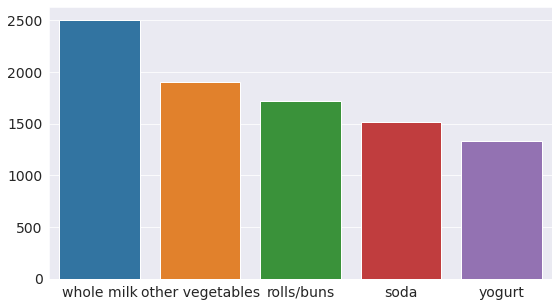

In [83]:
sns.barplot(x=df['itemDescription'].value_counts().head(5).index, y=df['itemDescription'].value_counts().head(5).values)

Member : Listed the count of repetation based number the number of Members. Here we can see that Member 3180 has 36 and very low : 2 for the member 2844.

In [84]:
df['Member_number'].value_counts()

3180    36
3050    33
2051    33
3737    33
2433    31
        ..
4565     2
2373     2
3788     2
2614     2
2844     2
Name: Member_number, Length: 3898, dtype: int64

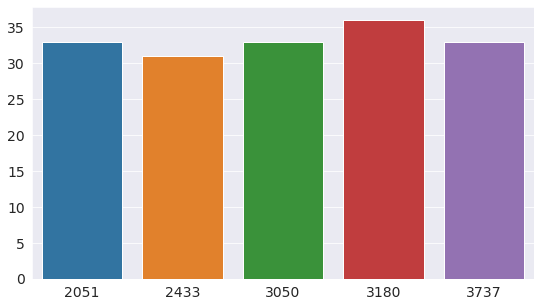

In [85]:
sns.barplot(x=df['Member_number'].value_counts().head(5).index, y=df['Member_number'].value_counts().head(5).values)

Verfied the total number of entries based on the purchage date where we can see that 96 entries on the date - 21-01-2015 and low number 22 on 01-0902015.

In [86]:
df['Date'].value_counts()

21-01-2015    96
21-07-2015    93
29-11-2015    92
08-08-2015    92
30-04-2015    91
              ..
29-06-2014    26
04-07-2014    24
16-03-2015    23
17-03-2015    23
01-09-2015    22
Name: Date, Length: 728, dtype: int64

In [87]:
df['Date'].value_counts().tail(5)

29-06-2014    26
04-07-2014    24
16-03-2015    23
17-03-2015    23
01-09-2015    22
Name: Date, dtype: int64

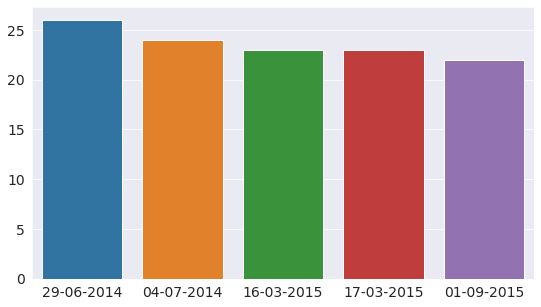

In [88]:
sns.barplot(x=df['Date'].value_counts().tail(5).index, y=df['Date'].value_counts().tail(5).values)

Tried to display te scatter plot for head of 10 entries of Member and itemdesciption. "Whole milk" has good number of entries for the multiple numbers.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


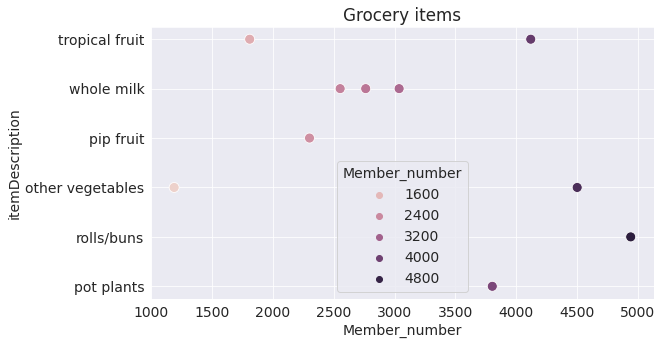

In [89]:
df1 = df.head(10)
sns.scatterplot(df1.Member_number, # X-axis
                df1.itemDescription,  # Y-axis
                hue=df1.Member_number,  # Dot color
                s=100);

# Title of the Chart
plt.title("Grocery items");

Let us save and upload our work to Jovian before continuing

In [90]:
import jovian

In [91]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: Please provide the project argument e.g. jovian.commit(project='my-project')


## Asking and Answering Questions




#### Q1: Identify the all items which were bought by a member number.

In [92]:
mem_num = input("Input the member number : (3180/3050) ")

Input the member number : (3180/3050) 3180


In [93]:
df1 = (df[df['Member_number'] == int(mem_num)])

In [94]:
df1

,Member_number,Date,itemDescription
421,3180,15-03-2015,whole milk
1810,3180,04-05-2015,tropical fruit
2054,3180,06-02-2015,ham
4041,3180,19-10-2015,root vegetables
4482,3180,15-09-2015,bottled beer
5052,3180,19-10-2015,pastry
5467,3180,03-07-2015,sausage
7684,3180,03-07-2015,other vegetables
8034,3180,15-09-2015,tropical fruit
10056,3180,24-02-2014,citrus fruit


#### Q2: How many types of particular items are available

In [95]:
df.itemDescription.unique

<bound method Series.unique of 0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object>

In [96]:
def chek_val(val):
    return df[df['itemDescription'].str.contains(val)]['itemDescription'].value_counts()

Here we need to provide the name of the "item" as an input.

In [97]:
in_type = input("Input a type : (fruit/milk/cheese/candy/bar/juice/food) : ")
print("Given type : ", in_type)

Input a type : (fruit/milk/cheese/candy/bar/juice/food) : food
Given type :  food


In [98]:
chek_val(in_type)

cat food                 177
dog food                  67
Instant food products     60
Name: itemDescription, dtype: int64

Below graph shows the number of items based on the selected item.

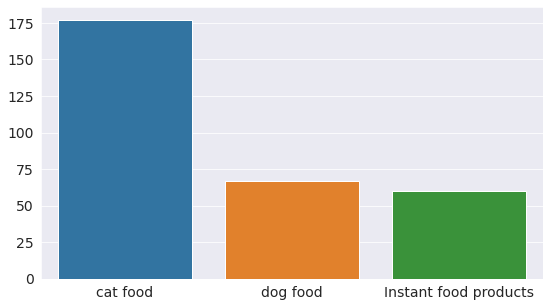

In [99]:
sns.barplot(x=chek_val(in_type).head(4).index, y=chek_val(in_type).head(4).values)

#### Q3: Display Nummber of items bougt by a member group by different Items.

In [100]:
df1 = df
df1.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [101]:
df1['itemDescription']  =df1['itemDescription'].apply(lambda x:x+', ')
df1.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,"tropical fruit,"
1,2552,05-01-2015,"whole milk,"
2,2300,19-09-2015,"pip fruit,"
3,1187,12-12-2015,"other vegetables,"
4,3037,01-02-2015,"whole milk,"


In [102]:
val = df1.groupby(['Member_number','Date'])['itemDescription'].sum()

In [103]:
val.head(10)

Member_number  Date      
1000           15-03-2015    sausage, whole milk, semi-finished bread, yogu...
               24-06-2014                    whole milk, pastry, salty snack, 
               24-07-2015                       canned beer, misc. beverages, 
               25-11-2015                          sausage, hygiene articles, 
               27-05-2015                           soda, pickled vegetables, 
1001           02-05-2015                                  frankfurter, curd, 
               07-02-2014                    sausage, whole milk, rolls/buns, 
               12-12-2014                                   whole milk, soda, 
               14-04-2015                                  beef, white bread, 
               20-01-2015              frankfurter, soda, whipped/sour cream, 
Name: itemDescription, dtype: object

In [104]:
val = pd.DataFrame(val).reset_index()

In [105]:
val.head(10)

,Member_number,Date,itemDescription
0,1000,15-03-2015,"sausage, whole milk, semi-finished bread, yogu..."
1,1000,24-06-2014,"whole milk, pastry, salty snack,"
2,1000,24-07-2015,"canned beer, misc. beverages,"
3,1000,25-11-2015,"sausage, hygiene articles,"
4,1000,27-05-2015,"soda, pickled vegetables,"
5,1001,02-05-2015,"frankfurter, curd,"
6,1001,07-02-2014,"sausage, whole milk, rolls/buns,"
7,1001,12-12-2014,"whole milk, soda,"
8,1001,14-04-2015,"beef, white bread,"
9,1001,20-01-2015,"frankfurter, soda, whipped/sour cream,"


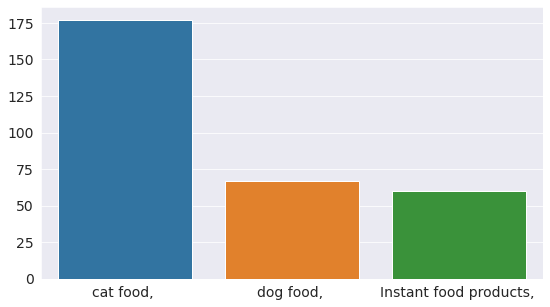

In [106]:
sns.barplot(x=chek_val(in_type).head(4).index, y=chek_val(in_type).head(4).values)

#### Q4: Display number of items bought based on a specific date

In [107]:
in_dt = input("Input the date : (14-04-2015/20-01-2015) : ")
print("Given date : ", in_dt)

Input the date : (14004-2015/20-01-2015) : 20-01-2015
Given date :  20-01-2015


In [108]:
df1 = (df[df['Date'] == (in_dt)])

In [109]:
df1

,Member_number,Date,itemDescription
59,1967,20-01-2015,"other vegetables,"
364,1001,20-01-2015,"frankfurter,"
1991,3985,20-01-2015,"bottled water,"
2554,2235,20-01-2015,"meat,"
2820,3575,20-01-2015,"photo/film,"
3045,2075,20-01-2015,"baking powder,"
3053,3797,20-01-2015,"sausage,"
3403,4390,20-01-2015,"whole milk,"
3527,2544,20-01-2015,"tropical fruit,"
3745,2889,20-01-2015,"citrus fruit,"


In [110]:
df1.shape

(40, 3)

In [111]:
print("Total numer of entries is ", df1.shape[0], " are done at the date : ", in_dt)

Total numer of entries is  40  are done at the date :  20-01-2015


Let us save and upload our work to Jovian before continuing.

In [112]:
import jovian

In [113]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: Please provide the project argument e.g. jovian.commit(project='my-project')


## Inferences and Conclusion

As part of this EDA we analyzed the Groceries dataset of different features. Identified the which member bought number of items on which date. Identified which day has more number of transactions and which item has more demand. These analysis is useful for the retailers to give promotions and bonus to the members.

In [114]:
import jovian

In [115]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: Please provide the project argument e.g. jovian.commit(project='my-project')


## References and Future Work

<br>1. Referred the Numpy library
<br>2. Referred the Pandas library
<br>3. Referred the Jovian study materials.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [116]:
import jovian

In [117]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: Please provide the project argument e.g. jovian.commit(project='my-project')
